In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import warnings
from sklearn.metrics import confusion_matrix

In [2]:
warnings.filterwarnings("ignore")

In [3]:
os.listdir("/kaggle/input/bank-marketing-response-predict")

['submission.csv', 'test_label.csv', 'train.csv', 'test.csv']

In [4]:
test_data = pd.read_csv("/kaggle/input/bank-marketing-response-predict/test.csv")
train_data = pd.read_csv("/kaggle/input/bank-marketing-response-predict/train.csv")
test_label = pd.read_csv("/kaggle/input/bank-marketing-response-predict/test_label.csv")
test_data = pd.merge(test_data,test_label,on = "ID",how = "inner")

In [5]:
train_data.shape , test_data.shape

((12870, 17), (4291, 17))

In [6]:
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.7+ MB


In [8]:
train_data.describe()

,ID,age,balance,day,campaign,pdays,previous
count,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000
mean,16434.500000,41.091142,1483.774437,15.641103,2.659130,45.555478,0.688967
std,3715.393317,11.305560,3311.055181,8.368983,2.863507,104.449411,2.049696
min,10000.000000,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,13217.250000,32.000000,102.000000,8.000000,1.000000,-1.000000,0.000000
50%,16434.500000,39.000000,515.000000,16.000000,2.000000,-1.000000,0.000000
75%,19651.750000,49.000000,1591.750000,21.000000,3.000000,-1.000000,0.000000
max,22869.000000,95.000000,102127.000000,31.000000,43.000000,854.000000,58.000000


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4291 non-null   int64 
 1   age        4291 non-null   int64 
 2   job        4291 non-null   object
 3   marital    4291 non-null   object
 4   education  4291 non-null   object
 5   default    4291 non-null   object
 6   balance    4291 non-null   int64 
 7   housing    4291 non-null   object
 8   loan       4291 non-null   object
 9   contact    4291 non-null   object
 10  day        4291 non-null   int64 
 11  month      4291 non-null   object
 12  campaign   4291 non-null   int64 
 13  pdays      4291 non-null   int64 
 14  previous   4291 non-null   int64 
 15  poutcome   4291 non-null   object
 16  y          4291 non-null   object
dtypes: int64(7), object(10)
memory usage: 570.0+ KB


In [10]:
test_data.describe()

,ID,age,balance,day,campaign,pdays,previous
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,52145.000000,40.919133,1474.078536,15.821254,2.611979,46.317409,0.709392
std,1238.849332,11.313492,3118.919570,8.337266,2.843344,104.036285,2.025399
min,50000.000000,18.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,51072.500000,32.000000,88.000000,8.000000,1.000000,-1.000000,0.000000
50%,52145.000000,39.000000,515.000000,16.000000,2.000000,-1.000000,0.000000
75%,53217.500000,49.000000,1612.000000,21.500000,3.000000,-1.000000,0.000000
max,54290.000000,94.000000,58932.000000,31.000000,44.000000,842.000000,29.000000


In [11]:
copy_train_data = train_data.copy()
copy_train_data.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no


In [12]:
copy_train_data["default"].unique()

array(['no', 'yes'], dtype=object)

In [13]:
label_encoder = LabelEncoder()
converted_numerical_job = label_encoder.fit_transform(copy_train_data["job"])
converted_numerical_marital = label_encoder.fit_transform(copy_train_data["marital"])
converted_numerical_education = label_encoder.fit_transform(copy_train_data["education"])
converted_numerical_default = label_encoder.fit_transform(copy_train_data["default"])
converted_numerical_hosing = label_encoder.fit_transform(copy_train_data["housing"])
converted_numerical_loan = label_encoder.fit_transform(copy_train_data["loan"])
converted_numerical_contract = label_encoder.fit_transform(copy_train_data["contact"])
converted_numerical_month = label_encoder.fit_transform(copy_train_data["month"])
converted_numerical_poutcome = label_encoder.fit_transform(copy_train_data["poutcome"])
converted_numerical_y = label_encoder.fit_transform(copy_train_data["y"])

In [14]:
copy_train_data["job"] = converted_numerical_job
copy_train_data["marital"] = converted_numerical_marital
copy_train_data["education"] = converted_numerical_education
copy_train_data["default"] = converted_numerical_default
copy_train_data["housing"] = converted_numerical_hosing
copy_train_data["loan"] = converted_numerical_loan
copy_train_data["contact"] = converted_numerical_contract
copy_train_data["month"] = converted_numerical_month
copy_train_data["poutcome"] = converted_numerical_poutcome
copy_train_data["y"] = converted_numerical_y

In [15]:
copy_train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,9,2,2,0,18254,0,0,0,11,8,2,-1,0,3,0
1,22677,26,7,2,1,0,512,1,1,2,5,6,3,-1,0,3,0
2,10541,30,4,2,1,0,135,0,0,0,14,1,2,-1,0,3,0
3,13689,41,9,1,3,0,30,1,0,0,10,5,1,-1,0,3,0
4,11304,27,0,2,1,0,321,0,1,2,2,11,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,9,1,1,0,1167,1,0,0,30,0,1,87,5,0,1
12866,17259,31,11,1,1,0,111,0,0,0,21,9,2,93,2,0,1
12867,15200,37,10,2,2,0,1316,1,0,0,18,9,1,172,2,0,0
12868,13775,42,4,1,2,0,479,1,0,2,28,8,2,-1,0,3,0


In [16]:
copy_train_data.drop(columns = "ID",axis = 1, inplace = True)

In [17]:
isolation_forest = IsolationForest()
isolation_forest.fit(copy_train_data)
outliers = isolation_forest.predict(copy_train_data)
filtered_data = copy_train_data[outliers == 1]
print(filtered_data)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       29    9        2          2        0    18254        0     0        0   
2       30    4        2          1        0      135        0     0        0   
3       41    9        1          3        0       30        1     0        0   
5       22    8        2          1        0      185        0     0        0   
7       38    0        0          1        0       74        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
12860   34    2        1          1        0     4659        1     0        2   
12864   50    0        0          1        0     3043        1     0        2   
12867   37   10        2          2        0     1316        1     0        0   
12868   42    4        1          2        0      479        1     0        2   
12869   24    7        2          1        0        0        0     0        2   

       day  month  campaign

In [18]:
x_train = filtered_data[copy_train_data.columns[0:15]]
y_train = filtered_data["y"]

In [19]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_train = standard_scaler.fit_transform(x_train)

In [20]:
copy_test_data = test_data.copy()
copy_test_data.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,53608,32,management,single,tertiary,no,12569,no,no,cellular,1,jul,2,295,2,success,yes
1,51055,25,services,single,secondary,no,801,no,no,cellular,5,jun,2,-1,0,unknown,yes
2,52573,46,blue-collar,married,secondary,no,1728,yes,no,unknown,26,may,2,-1,0,unknown,no
3,50458,39,management,divorced,secondary,no,51,no,no,unknown,17,jun,2,-1,0,unknown,no
4,52272,31,services,single,tertiary,no,1626,no,no,unknown,31,jul,1,-1,0,unknown,no


In [21]:
copy_test_data.drop(columns = "ID",axis = 1, inplace = True)

In [22]:
label_encoder = LabelEncoder()
converted_numerical_test_job = label_encoder.fit_transform(copy_test_data["job"])
converted_numerical_test_marital = label_encoder.fit_transform(copy_test_data["marital"])
converted_numerical_test_education = label_encoder.fit_transform(copy_test_data["education"])
converted_numerical_test_default = label_encoder.fit_transform(copy_test_data["default"])
converted_numerical_test_hosing = label_encoder.fit_transform(copy_test_data["housing"])
converted_numerical_test_loan = label_encoder.fit_transform(copy_test_data["loan"])
converted_numerical_test_contract = label_encoder.fit_transform(copy_test_data["contact"])
converted_numerical_test_month = label_encoder.fit_transform(copy_test_data["month"])
converted_numerical_test_poutcome = label_encoder.fit_transform(copy_test_data["poutcome"])
converted_numerical_test_y = label_encoder.fit_transform(copy_test_data["y"])

In [23]:
copy_test_data["job"] = converted_numerical_test_job
copy_test_data["marital"] = converted_numerical_test_marital
copy_test_data["education"] = converted_numerical_test_education
copy_test_data["default"] = converted_numerical_test_default
copy_test_data["housing"] = converted_numerical_test_hosing
copy_test_data["loan"] = converted_numerical_test_loan
copy_test_data["contact"] = converted_numerical_test_contract
copy_test_data["month"] = converted_numerical_test_month
copy_test_data["poutcome"] = converted_numerical_test_poutcome
copy_test_data["y"] = converted_numerical_test_y

In [24]:
x_test = copy_test_data[copy_test_data.columns[0:15]]
y_test = copy_test_data["y"]

In [25]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_test)
x_test = standard_scaler.fit_transform(x_test)

In [33]:
x_train , x_test

(array([[-1.10509266,  1.42867463,  1.38471848, ..., -0.26980901,
         -0.26213585,  0.27655579],
        [-1.0090446 , -0.11628233,  1.38471848, ..., -0.26980901,
         -0.26213585,  0.27655579],
        [ 0.04748411,  1.42867463, -0.34467718, ..., -0.26980901,
         -0.26213585,  0.27655579],
        ...,
        [-0.33670815,  1.73766603,  1.38471848, ...,  2.86445516,
          2.65233818, -4.72188351],
        [ 0.14353217, -0.11628233, -0.34467718, ..., -0.26980901,
         -0.26213585,  0.27655579],
        [-1.58533299,  0.81069185,  1.38471848, ..., -0.26980901,
         -0.26213585,  0.27655579]]),
 array([[-0.78845443, -0.13993389,  1.33230277, ...,  2.39062336,
          0.63728617, -0.52335898],
        [-1.40725684,  0.7758612 ,  1.33230277, ..., -0.4548694 ,
         -0.35028875,  0.48369635],
        [ 0.44915038, -1.05572898, -0.29784014, ..., -0.4548694 ,
         -0.35028875,  0.48369635],
        ...,
        [-0.08125168, -1.36099401, -0.29784014, ..., -

In [27]:
y_train,y_test

(0        0
 2        0
 3        0
 5        1
 7        0
         ..
 12860    0
 12864    0
 12867    0
 12868    0
 12869    0
 Name: y, Length: 9784, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 4286    0
 4287    1
 4288    0
 4289    1
 4290    0
 Name: y, Length: 4291, dtype: int64)

In [28]:
def build_model(hp):
    model = keras.Sequential()

    num_conv_layers = hp.Int('num_layers', min_value=1, max_value=10, step=1)
    for i in range(num_conv_layers):
        model.add(layers.Dense(
            units=hp.Int(f'{i}_filters', min_value=32, max_value=228, step=32),
            activation='relu'
        ))
    model.add(layers.Flatten())

    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=3, step=1)
    for i in range(num_dense_layers):
        model.add(layers.Dense(
            units=hp.Int(f'dense_{i}_units', min_value=32, max_value=212, step=32),
            activation='relu'
        ))

    model.add(layers.Dense(2, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=30,
    executions_per_trial=5
)

tuner.search(x_train, y_train,
             epochs=15,
             validation_data=(x_test, y_test)
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters using Keras_tuner: {best_hps}")

Trial 30 Complete [00h 02m 24s]
val_accuracy: 0.748590064048767

Best val_accuracy So Far: 0.7568398952484131
Total elapsed time: 01h 14m 25s
Best Hyperparameters using Keras_tuner: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7c546e2dd390>


In [31]:
best_hps = tuner.get_best_hyperparameters(num_trials= 1)[0]
best_model = tuner.hypermodel.build(best_hps)
call= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = best_model.fit(x_train,y_train, validation_data= (x_test,y_test), epochs=1000,callbacks=[call])

Epoch 1/1000
306/306 [==============================] - 2s 4ms/step - loss: 0.4962 - accuracy: 0.7697 - val_loss: 0.5483 - val_accuracy: 0.7406
Epoch 2/1000
306/306 [==============================] - 1s 3ms/step - loss: 0.4782 - accuracy: 0.7793 - val_loss: 0.5532 - val_accuracy: 0.7404
Epoch 3/1000
306/306 [==============================] - 1s 3ms/step - loss: 0.4721 - accuracy: 0.7863 - val_loss: 0.5458 - val_accuracy: 0.7516
Epoch 4/1000
306/306 [==============================] - 1s 4ms/step - loss: 0.4663 - accuracy: 0.7883 - val_loss: 0.5365 - val_accuracy: 0.7530
Epoch 5/1000
306/306 [==============================] - 1s 4ms/step - loss: 0.4627 - accuracy: 0.7873 - val_loss: 0.5501 - val_accuracy: 0.7506
Epoch 6/1000
306/306 [==============================] - 1s 4ms/step - loss: 0.4601 - accuracy: 0.7919 - val_loss: 0.5500 - val_accuracy: 0.7497
Epoch 7/1000
306/306 [==============================] - 1s 4ms/step - loss: 0.4549 - accuracy: 0.7939 - val_loss: 0.5552 - val_accuracy:

<Axes: >

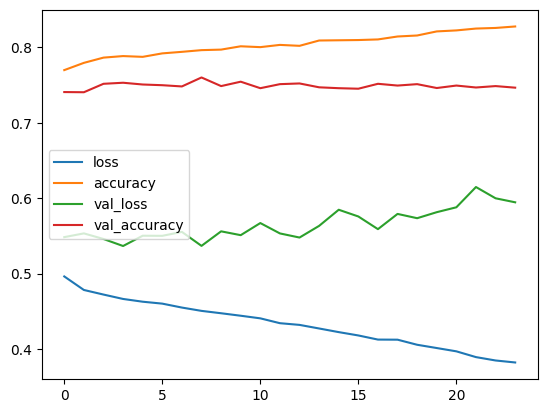

In [32]:
pd.DataFrame(history.history).plot()

135/135 [==============================] - 0s 1ms/step


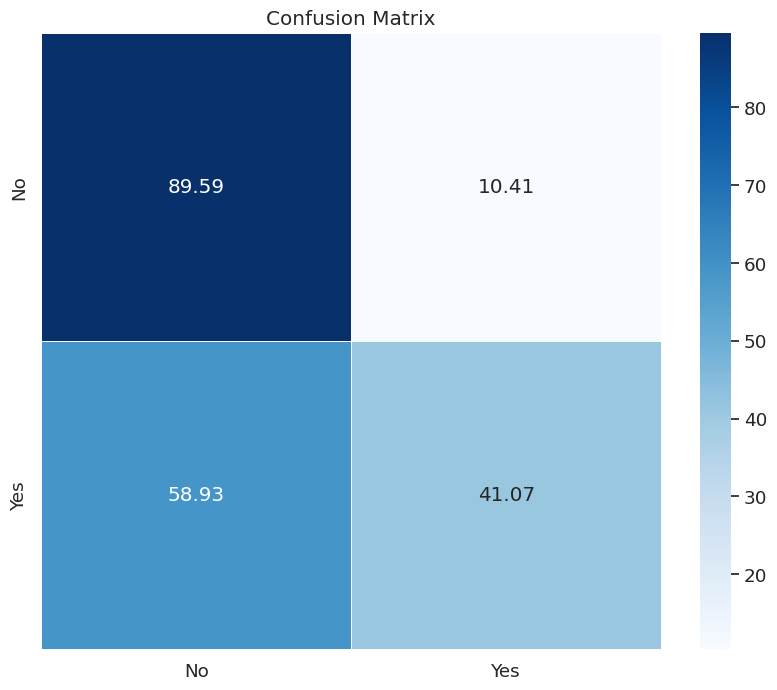

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predictions = best_model.predict(x_test)  
predicted_x_test= np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, predicted_x_test)
sum_per_class = conf_matrix.sum(axis=1) 
conf_matrix_percent = (conf_matrix.T / sum_per_class).T * 100  
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", linewidths= 0.5, xticklabels= ["No","Yes"] , yticklabels= ["No","Yes"])  
plt.title('Confusion Matrix')
plt.show()